In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

Using TensorFlow backend.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from pandas_datareader import data as web
%matplotlib inline

In [5]:
from pandas import DataFrame as df 
bitcoin = web.DataReader('AAPL', data_source = 'yahoo', start = '01/01/2012', end = '11/02/2017')

In [10]:
#new = [i for i in bitcoin.Close.values if nan not in i]
bitcoin.Close = bitcoin.Close.fillna(-0.5)

yahoo_bitcoin_prices = bitcoin.Close.values.astype('float32')
#yahoo_bitcoin_prices(yahoo_bitcoin_prices==NaN)=[]
yahoo_bitcoin_prices = yahoo_bitcoin_prices.reshape(1470, 1)
yahoo_bitcoin_prices.shape
#print(yahoo_bitcoin_prices)

(1470, 1)

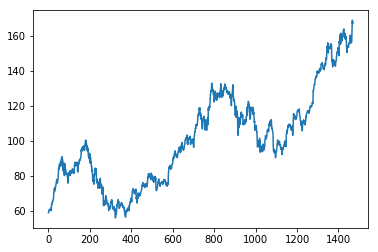

In [11]:

plt.plot(yahoo_bitcoin_prices)
plt.show()



In [12]:
scaler = MinMaxScaler(feature_range=(0.2,0.8))
yahoo_bitcoin_prices = scaler.fit_transform(yahoo_bitcoin_prices)
print(yahoo_bitcoin_prices[212])

[ 0.34555912]


In [13]:
train_size = int(len(yahoo_bitcoin_prices) * 0.80)
test_size = len(yahoo_bitcoin_prices) - train_size
train, test = yahoo_bitcoin_prices[0:train_size,:], yahoo_bitcoin_prices[train_size:len(yahoo_bitcoin_prices),:]
print(len(train), len(test))

1176 294


In [14]:
def create_dataset(dataset, look_back=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
#print(trainX)
print(testX, trainX, trainY, testY)
#print(trainY)
#print(testY)


[[ 0.47501993]
 [ 0.47851664]
 [ 0.46347022]
 [ 0.45080799]
 [ 0.46304643]
 [ 0.47634441]
 [ 0.49658281]
 [ 0.51671529]
 [ 0.51327157]
 [ 0.50617224]
 [ 0.50611925]
 [ 0.50601333]
 [ 0.51168221]
 [ 0.50156295]
 [ 0.50246364]
 [ 0.50357622]
 [ 0.50813252]
 [ 0.49875504]
 [ 0.50336432]
 [ 0.50055635]
 [ 0.50309938]
 [ 0.50336432]
 [ 0.50781465]
 [ 0.50871527]
 [ 0.51925838]
 [ 0.52058285]
 [ 0.52609277]
 [ 0.52418548]
 [ 0.5276292 ]
 [ 0.52720535]
 [ 0.5267815 ]
 [ 0.5249272 ]
 [ 0.52460933]
 [ 0.52217221]
 [ 0.52773517]
 [ 0.53091395]
 [ 0.51682121]
 [ 0.51094049]
 [ 0.50691396]
 [ 0.50596035]
 [ 0.49509937]
 [ 0.49562919]
 [ 0.4863047 ]
 [ 0.48105961]
 [ 0.48937756]
 [ 0.49282122]
 [ 0.4918676 ]
 [ 0.47549677]
 [ 0.4788875 ]
 [ 0.46447688]
 [ 0.47189409]
 [ 0.48715234]
 [ 0.48694044]
 [ 0.4875232 ]
 [ 0.49637091]
 [ 0.49674177]
 [ 0.4937219 ]
 [ 0.49668878]
 [ 0.49552321]
 [ 0.49494046]
 [ 0.48996031]
 [ 0.48450333]
 [ 0.48667556]
 [ 0.48249012]
 [ 0.48694044]
 [ 0.49266231]
 [ 0.49843

In [17]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#print(trainX)
print('\n')
print(testX)



[[[ 0.47501993]]

 [[ 0.47851664]]

 [[ 0.46347022]]

 [[ 0.45080799]]

 [[ 0.46304643]]

 [[ 0.47634441]]

 [[ 0.49658281]]

 [[ 0.51671529]]

 [[ 0.51327157]]

 [[ 0.50617224]]

 [[ 0.50611925]]

 [[ 0.50601333]]

 [[ 0.51168221]]

 [[ 0.50156295]]

 [[ 0.50246364]]

 [[ 0.50357622]]

 [[ 0.50813252]]

 [[ 0.49875504]]

 [[ 0.50336432]]

 [[ 0.50055635]]

 [[ 0.50309938]]

 [[ 0.50336432]]

 [[ 0.50781465]]

 [[ 0.50871527]]

 [[ 0.51925838]]

 [[ 0.52058285]]

 [[ 0.52609277]]

 [[ 0.52418548]]

 [[ 0.5276292 ]]

 [[ 0.52720535]]

 [[ 0.5267815 ]]

 [[ 0.5249272 ]]

 [[ 0.52460933]]

 [[ 0.52217221]]

 [[ 0.52773517]]

 [[ 0.53091395]]

 [[ 0.51682121]]

 [[ 0.51094049]]

 [[ 0.50691396]]

 [[ 0.50596035]]

 [[ 0.49509937]]

 [[ 0.49562919]]

 [[ 0.4863047 ]]

 [[ 0.48105961]]

 [[ 0.48937756]]

 [[ 0.49282122]]

 [[ 0.4918676 ]]

 [[ 0.47549677]]

 [[ 0.4788875 ]]

 [[ 0.46447688]]

 [[ 0.47189409]]

 [[ 0.48715234]]

 [[ 0.48694044]]

 [[ 0.4875232 ]]

 [[ 0.49637091]]

 [[ 0.49

In [18]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
#model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  import sys
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  app.launch_new_instance()


compilation time :  0.15039539337158203


In [19]:
model.fit(
    trainX,
    trainY,
    batch_size=71,
    nb_epoch=10,
    validation_split=0.05)

C:\Users\user\Anaconda3\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1115 samples, validate on 59 samples
Epoch 1/10
1115/1115 [==============================] - 4s - loss: 0.1018 - val_loss: 0.0590
Epoch 2/10
1115/1115 [==============================] - 0s - loss: 0.0227 - val_loss: 0.0049
Epoch 3/10
1115/1115 [==============================] - 0s - loss: 0.0057 - val_loss: 0.0014
Epoch 4/10
1115/1115 [==============================] - 0s - loss: 0.0050 - val_loss: 0.0010
Epoch 5/10
1115/1115 [==============================] - 0s - loss: 0.0041 - val_loss: 4.4381e-04
Epoch 6/10
1115/1115 [==============================] - 0s - loss: 0.0030 - val_loss: 0.0010
Epoch 7/10
1115/1115 [==============================] - 0s - loss: 0.0020 - val_loss: 0.0012
Epoch 8/10
1115/1115 [==============================] - 0s - loss: 0.0014 - val_loss: 5.7621e-04
Epoch 9/10
1115/1115 [==============================] - 0s - loss: 0.0012 - val_loss: 3.5724e-04
Epoch 10/10
1115/1115 [==============================] - 0s - loss: 9.6703e-04 - val_loss: 1.6077e-04


[[ 0.24238813]]
[[ 0.46549454]]
[[ 0.73095834]]
[[ 1.06738639]]
[[ 1.50407052]]
[[   497.04846191]
 [  3115.85424805]
 [  6231.84765625]
 [ 10180.81347656]
 [ 15306.578125  ]]


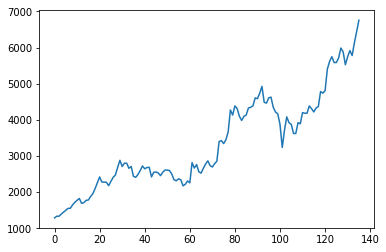

In [116]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
#print(predictions)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)


In [89]:
print(yahoo_bitcoin_prices[568])
print(testX[0])
print(trainX[0])

[ 0.30252665]
[[ 0.30252665]]
[[ 0.21875204]]


In [135]:
print(bitcoin.Close[647])

3401.360596
